1 – Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("Netflix Dataset Analysis by Barath S")
print("VOIS AICTE Oct2025 Major Project")
print("="*50)

Netflix Dataset Analysis by Barath S
VOIS AICTE Oct2025 Major Project


2 – Load Dataset and Basic Setup

In [2]:
df = pd.read_csv('Netflix Dataset (4).csv')
print(f"Dataset loaded successfully: {len(df)} titles")

# Convert 'Release_Date' to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

# Basic plot style setup
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

df.head()

Dataset loaded successfully: 7789 titles


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


3 – Movies vs TV Shows Distribution

Movies: 5379 (69.1%)
TV Shows: 2410 (30.9%)


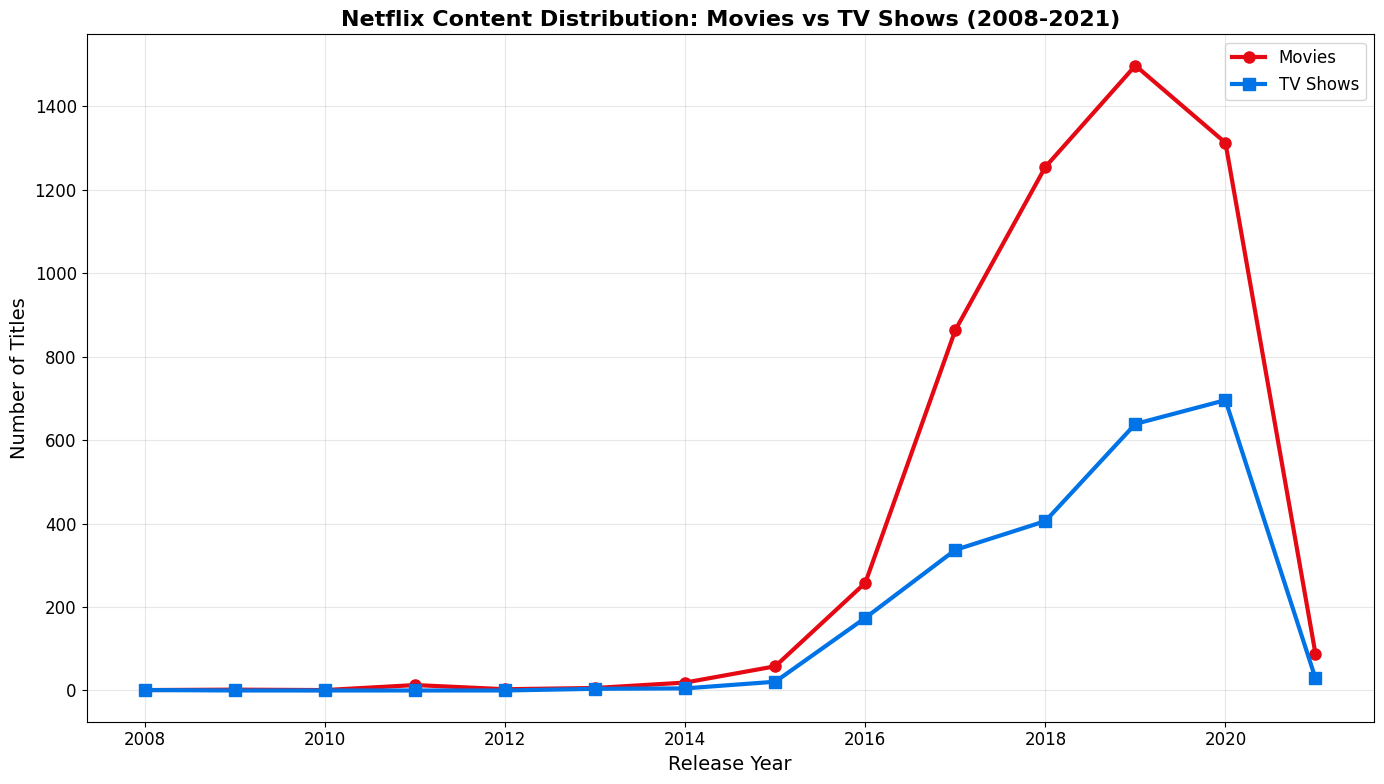

In [3]:
# Count movies vs TV shows
category_distribution = df['Category'].value_counts()
movies_count = category_distribution['Movie']
tv_shows_count = category_distribution['TV Show']

print(f"Movies: {movies_count} ({movies_count/len(df)*100:.1f}%)")
print(f"TV Shows: {tv_shows_count} ({tv_shows_count/len(df)*100:.1f}%)")

# Trend over years
category_by_year = df.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
plt.plot(category_by_year.index, category_by_year['Movie'], marker='o', linewidth=3, markersize=8, color='#E50914', label='Movies')
plt.plot(category_by_year.index, category_by_year['TV Show'], marker='s', linewidth=3, markersize=8, color='#0073E6', label='TV Shows')
plt.title('Netflix Content Distribution: Movies vs TV Shows (2008-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('movies_vs_tvshows_chart.png', dpi=300, bbox_inches='tight')
plt.show()


4 – Top Genres Analysis


Top 15 Genres:
 1. International Movies: 2437
 2. Dramas: 2108
 3. Comedies: 1472
 4. International TV Shows: 1199
 5. Documentaries: 786
 6. Action & Adventure: 721
 7. TV Dramas: 704
 8. Independent Movies: 675
 9. Children & Family Movies: 532
10. Romantic Movies: 531
11. TV Comedies: 525
12. Thrillers: 492
13. Crime TV Shows: 427
14. Kids' TV: 414
15. Docuseries: 353


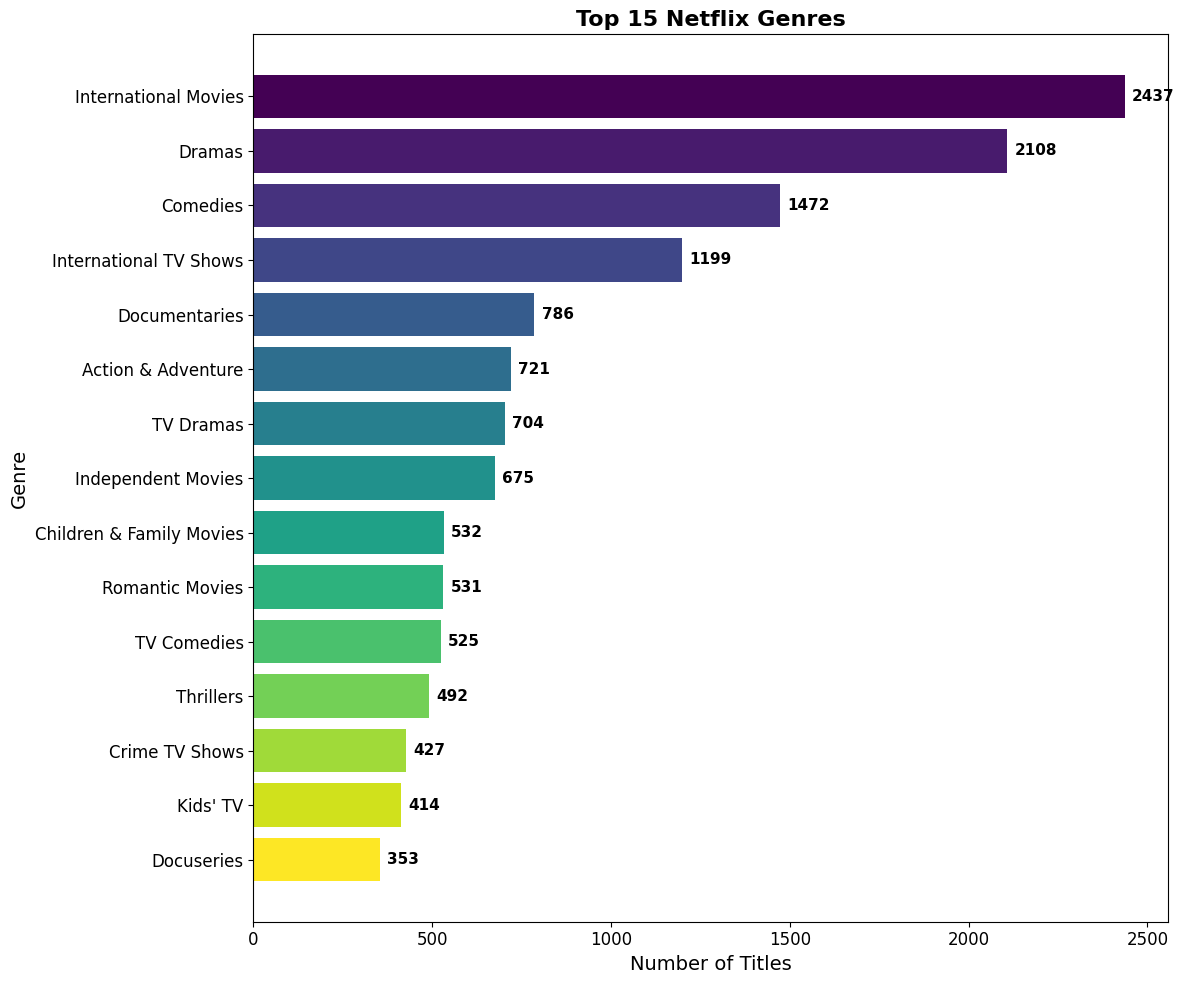

In [4]:
# Extract genres from 'Type' column
all_genres = []
for genres in df['Type'].dropna():
    genre_list = [genre.strip() for genre in genres.split(',')]
    all_genres.extend(genre_list)

# Count and display top 15 genres
genre_counts = Counter(all_genres)
top_15_genres = dict(genre_counts.most_common(15))

print("\nTop 15 Genres:")
for i, (genre, count) in enumerate(top_15_genres.items(), 1):
    print(f"{i:2d}. {genre}: {count}")

# Plot top genres
plt.figure(figsize=(12, 10))
genres = list(top_15_genres.keys())
counts = list(top_15_genres.values())
colors = plt.cm.viridis(np.linspace(0, 1, len(genres)))

bars = plt.barh(genres, counts, color=colors)
plt.title('Top 15 Netflix Genres', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=14)
plt.ylabel('Genre', fontsize=14)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='left', va='center', fontsize=11, fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_genres_chart.png', dpi=300, bbox_inches='tight')
plt.show()


5 – Top Countries Contribution


Top 10 Countries:
 1. United States: 3298
 2. India: 990
 3. United Kingdom: 723
 4. Canada: 412
 5. France: 349
 6. Japan: 287
 7. Spain: 215
 8. South Korea: 212
 9. Germany: 199
10. Mexico: 154


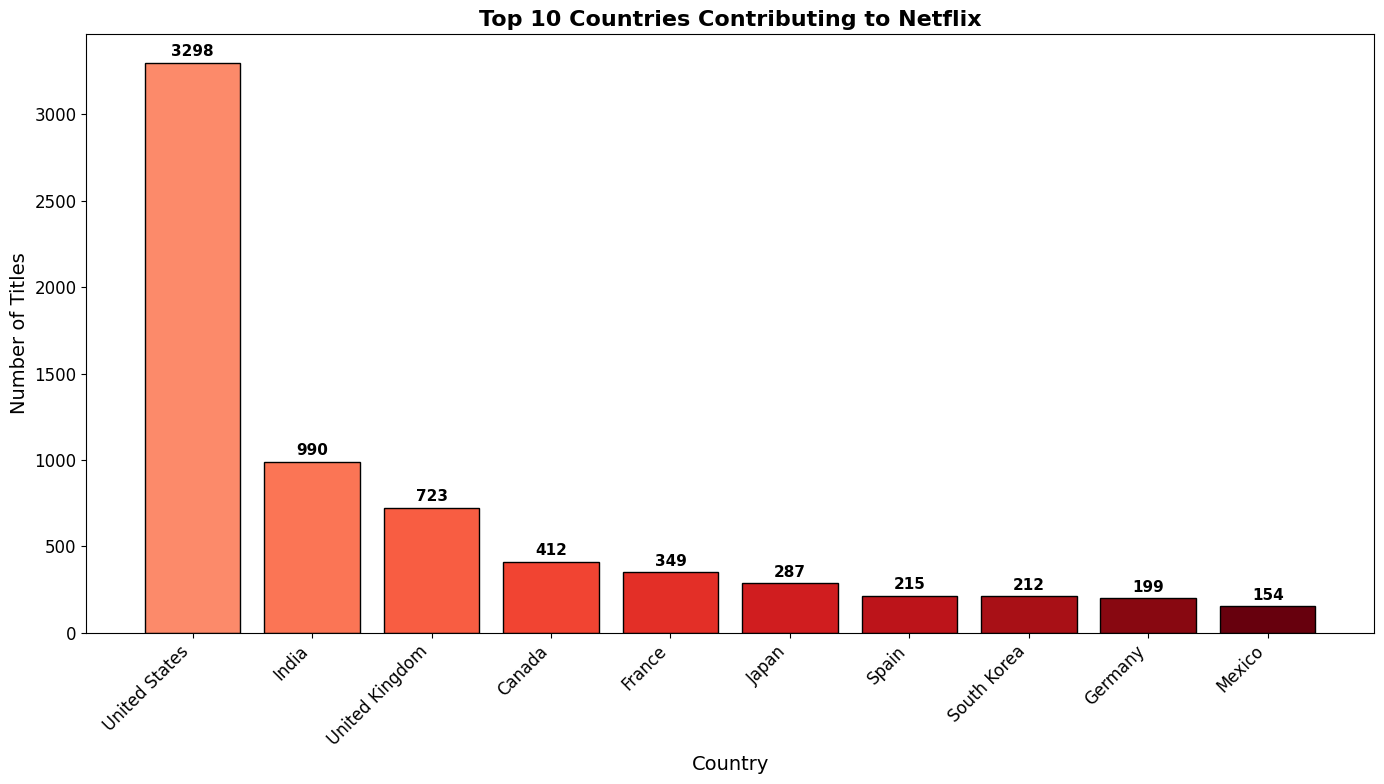

In [5]:
# Extract and count countries
all_countries = []
for countries in df['Country'].dropna():
    country_list = [country.strip() for country in countries.split(',')]
    all_countries.extend(country_list)

country_counts = Counter(all_countries)
top_10_countries = dict(country_counts.most_common(10))

print("\nTop 10 Countries:")
for i, (country, count) in enumerate(top_10_countries.items(), 1):
    print(f"{i:2d}. {country}: {count}")

# Plot top countries
plt.figure(figsize=(14, 8))
countries = list(top_10_countries.keys())
counts = list(top_10_countries.values())
colors = plt.cm.Reds(np.linspace(0.4, 1, len(countries)))

bars = plt.bar(countries, counts, color=colors, edgecolor='black', linewidth=1)
plt.title('Top 10 Countries Contributing to Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('top_countries_chart.png', dpi=300, bbox_inches='tight')
plt.show()


6 – Rating Distribution


Top 5 Ratings:
1. TV-MA: 2865 (36.8%)
2. TV-14: 1931 (24.8%)
3. TV-PG: 806 (10.3%)
4. R: 665 (8.5%)
5. PG-13: 386 (5.0%)


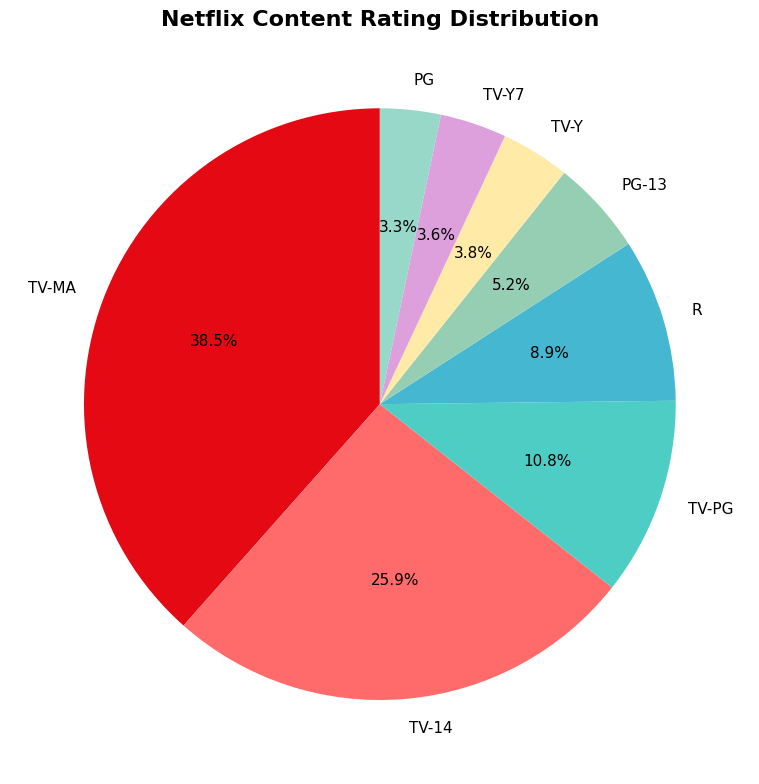

In [6]:
rating_dist = df['Rating'].value_counts()

print("\nTop 5 Ratings:")
for i, (rating, count) in enumerate(rating_dist.head(5).items(), 1):
    print(f"{i}. {rating}: {count} ({count/len(df)*100:.1f}%)")

# Pie chart for top ratings
plt.figure(figsize=(10, 8))
top_ratings = rating_dist.head(8)
colors = ['#E50914', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']

plt.pie(top_ratings.values, labels=top_ratings.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11})
plt.title('Netflix Content Rating Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('rating_distribution_chart.png', dpi=300, bbox_inches='tight')
plt.show()


7 – Movie Duration Distribution

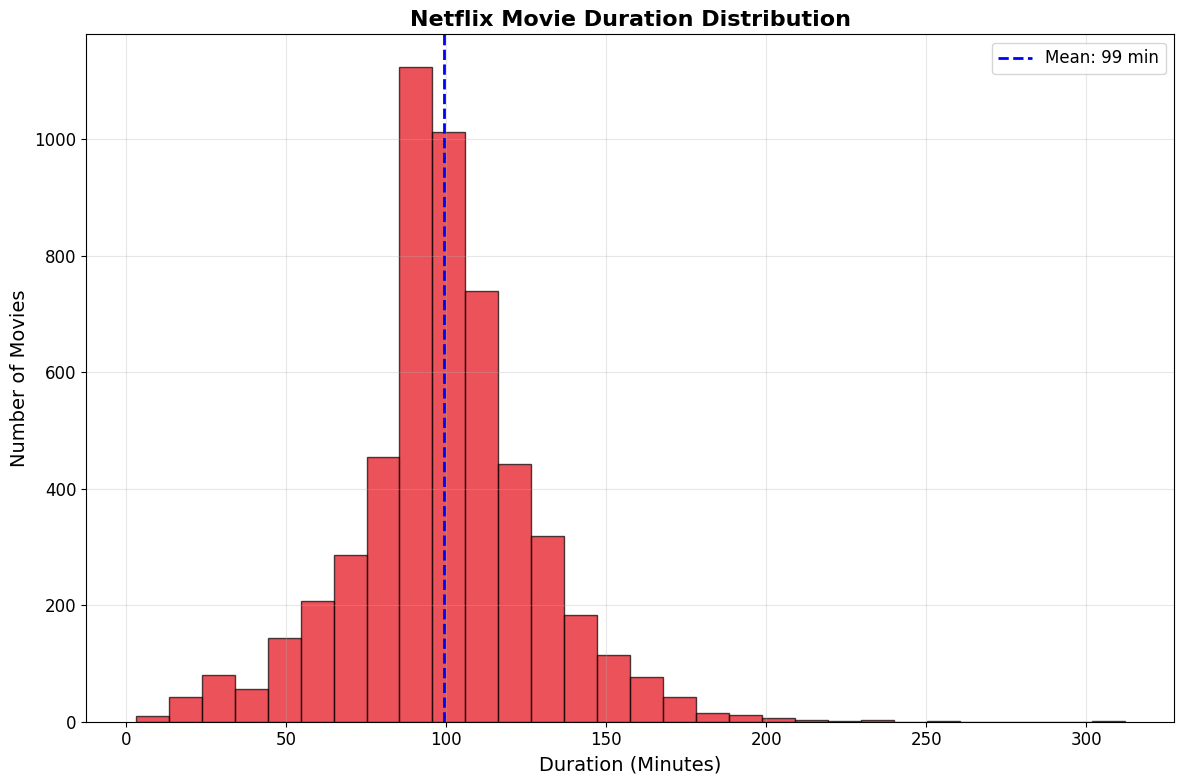

In [7]:
movies_df = df[df['Category'] == 'Movie'].copy()
movies_df['Duration_Minutes'] = movies_df['Duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(12, 8))
plt.hist(movies_df['Duration_Minutes'].dropna(), bins=30, color='#E50914', alpha=0.7, edgecolor='black')
plt.axvline(movies_df['Duration_Minutes'].mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Mean: {movies_df["Duration_Minutes"].mean():.0f} min')
plt.title('Netflix Movie Duration Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minutes)', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('movie_duration_chart.png', dpi=300, bbox_inches='tight')
plt.show()


8 – Key Findings Summary

In [8]:
yearly_content = df.groupby('Release_Year').size()
peak_year = yearly_content.idxmax()

print("\nKey Findings:")
print(f"Peak year: {int(peak_year)} ({yearly_content.max()} titles)")
print(f"Average movie duration: {movies_df['Duration_Minutes'].mean():.1f} minutes")
print(f"Most common rating: {rating_dist.index[0]}")
print(f"Countries represented: {len(country_counts)}")
print(f"Total genres: {len(genre_counts)}")

print("\nAnalysis complete by Nidhin R")
print("Charts saved:")
print(" - movies_vs_tvshows_chart.png")
print(" - top_genres_chart.png")
print(" - top_countries_chart.png")
print(" - rating_distribution_chart.png")
print(" - movie_duration_chart.png")



Key Findings:
Peak year: 2019 (2137 titles)
Average movie duration: 99.3 minutes
Most common rating: TV-MA
Countries represented: 118
Total genres: 42

Analysis complete by Nidhin R
Charts saved:
 - movies_vs_tvshows_chart.png
 - top_genres_chart.png
 - top_countries_chart.png
 - rating_distribution_chart.png
 - movie_duration_chart.png
